<a href="https://colab.research.google.com/github/Kasthlen/kasthlen-aprendizaje-no-supervisado/blob/main/kasthlen_clustering_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importar librerias


## Vinculación a GitHub

Puedes vincular este notebook a tu repositorio de GitHub guardando una copia. Sigue estos pasos:

1.  **Guardar una copia en GitHub:** Ve a `Archivo` > `Guardar una copia en GitHub`.
2.  **Selecciona tu repositorio:** Elige el repositorio `Bootcamp-IA-P5/kasthlen-aprendizaje-no-supervisado`.
3.  **Elige la rama y el nombre del archivo:** Selecciona la rama donde quieres guardar el notebook (por defecto suele ser `main` o `master`) y dale un nombre al archivo (por ejemplo, `aprendizaje_no_supervisado.ipynb`).
4.  **Confirma:** Haz clic en "Aceptar" o "Guardar".

¡Tu notebook ahora estará en tu repositorio de GitHub!

In [ ]:
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para clustering y preprocesamiento de scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print("¡Librerías importadas correctamente!")

¡Librerías importadas correctamente!


#2. Cargar un conjunto de datos

In [ ]:
# URL del dataset de setas. Es un archivo .data, pero se puede leer como un CSV.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

# Los nombres de las columnas no vienen en el archivo, así que los definimos nosotros.
# La primera columna es la clase ('p' = poisonous, 'e' = edible)
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

# Cargamos los datos usando pandas, indicando que no hay encabezado y asignando nuestros nombres
df = pd.read_csv(url, header=None, names=column_names)

print("Dataset de Setas cargado correctamente.")
df.head()

Dataset de Setas cargado correctamente.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#3. Exploración Básica de los Datos

In [ ]:
# Mostramos información general del DataFrame (tipos de datos, si hay nulos, etc.)
print("Información general del DataFrame:")
df.info()

print("\n" + "="*50 + "\n")

# Mostramos estadísticas descriptivas (media, desviación estándar, etc.)
print("Estadísticas descriptivas:")
df.describe()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   o

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#4. Preprocesamiento de datos


In [ ]:
# Contamos cuántas veces aparece cada valor en la columna 'stalk-root'
print("Valores en la columna 'stalk-root':")
df['stalk-root'].value_counts()

Valores en la columna 'stalk-root':


,count
stalk-root,
b,3776
?,2480
e,1120
c,556
r,192


4.2 convertir el texto (variables) a numeros "Codificación"

In [ ]:
# Primero, separamos la columna 'class' (nuestro objetivo) de las características
X = df.drop('class', axis=1)
y = df['class']

# Ahora, convertimos todas las columnas de características a formato numérico
X_encoded = pd.get_dummies(X)

print("¡Los datos han sido transformados a formato numérico!")
X_encoded.head()

¡Los datos han sido transformados a formato numérico!


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


4.3 Codificación a Enteros (0 y 1)

In [ ]:
# URL del dataset de setas. Es un archivo .data, pero se puede leer como un CSV.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

# Los nombres de las columnas no vienen en el archivo, así que los definimos nosotros.
# La primera columna es la clase ('p' = poisonous, 'e' = edible)
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

# Cargamos los datos usando pandas, indicando que no hay encabezado y asignando nuestros nombres
df = pd.read_csv(url, header=None, names=column_names)

# Primero, separamos la columna 'class' (nuestro objetivo) de las características
X = df.drop('class', axis=1)
y = df['class']

# Ahora, convertimos todas las columnas a formato numérico, especificando que queremos enteros
X_encoded = pd.get_dummies(X, dtype=int)

print("¡Los datos han sido transformados a formato numérico (0s y 1s)!")
X_encoded.head()

¡Los datos han sido transformados a formato numérico (0s y 1s)!


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#6. Reducción de Dimensionalidad con PCA (Análisis de Componentes Principales)


In [ ]:
from sklearn.decomposition import PCA

# Creamos una instancia de PCA, pidiéndole que encuentre los 2 componentes principales
pca = PCA(n_components=2)

# Aplicamos PCA a nuestros datos codificados.
# .fit_transform() aprende la transformación y la aplica al mismo tiempo.
X_pca = pca.fit_transform(X_encoded)

# El resultado X_pca es un array de NumPy. Vamos a convertirlo a un DataFrame de pandas
# para que sea más fácil de visualizar y manejar.
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Para poder colorear nuestro futuro gráfico, vamos a añadir la clase original (venenosa/comestible)
# a este nuevo DataFrame.
# Usamos .values para evitar problemas de alineación de índices.
df_pca['class'] = y.values

print("¡Reducción de dimensionalidad con PCA completada!")
df_pca.head()

¡Reducción de dimensionalidad con PCA completada!


,Componente Principal 1,Componente Principal 2,class
0,0.996245,-0.946892,p
1,1.441733,-0.164154,e
2,1.524085,-0.408746,e
3,1.151800,-0.675820,p
4,0.617503,-0.996143,e


6.2 Visualizar los resultados de PCA


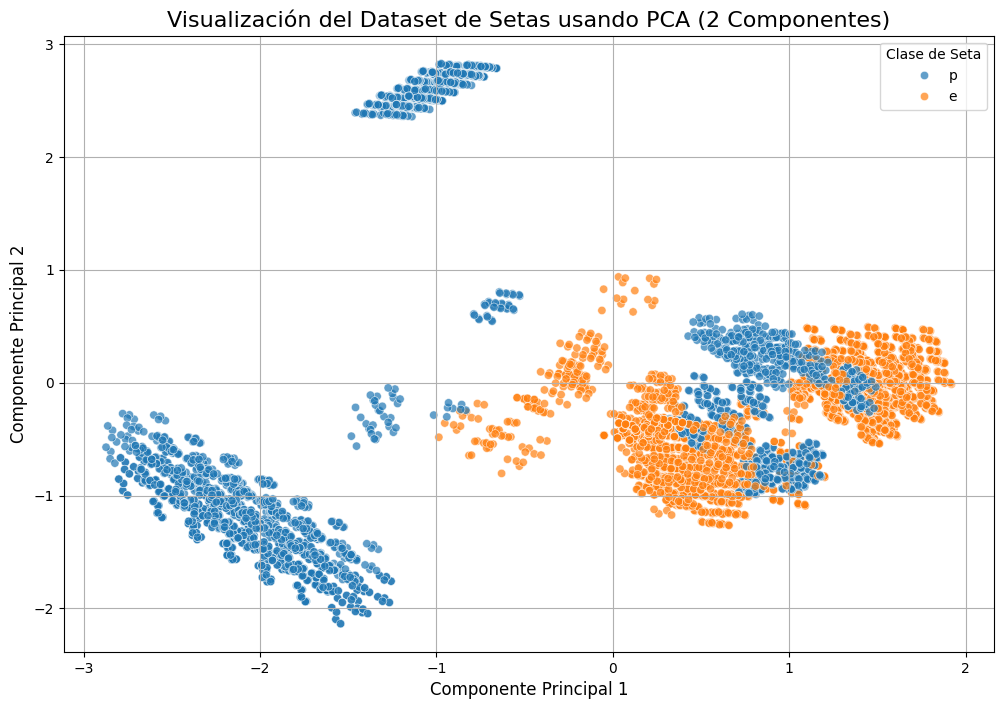

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='class', data=df_pca, alpha=0.7)

plt.title('Visualización del Dataset de Setas usando PCA (2 Componentes)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Clase de Seta')
plt.grid(True)
plt.show()